# Perceptron 이해하기

$h(x) = w_0+w^Tx = w_0+w_1x_1+w_2x_2$

$w = \begin{bmatrix} w_0 \\ w_1 \\ w_2 \end{bmatrix}$

$x = \begin{bmatrix} (x^{(1)})^T \\ (x^{(2)})^T \\ ... \\ (x^{(m)})^T \end{bmatrix} = \begin{bmatrix} 1&x_1^{(1)}&x_2^{(1)} \\ 1&x_1^{(2)}&x_2^{(2)} \\ ... \\ 1&x_1^{(m)}&x_2^{(m)} \end{bmatrix}$

$y= \begin{bmatrix} y^{(1)} \\ y^{(2)} \\... \\ y^{(m)} \end{bmatrix}$

퍼셉트론의 수식 표현: $sign(h(x))$

$sign(h(x)): \begin{Bmatrix} h(x)>0: +1 \\ h(x)<0: -1  \end{Bmatrix} $


#1. 패키지 로드

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

#무슨 의미인지 설명 

* 시드 고정

In [160]:
np.random.seed(37)

#2. 데이터 생성(선형분리가 가능한 데이터)

In [161]:
#training data gerneration
m = 100

x1 = 8*np.random.rand(m, 1) #mX1 행렬 
x2 = 7*np.random.rand(m, 1) - 4

g = 0.8*x1 + x2 - 3

In [162]:
data = pd.DataFrame({'x1': x1.reshape(-1),
                    'x2': x2.reshape(-1),
                    'g' : g.reshape(-1)})

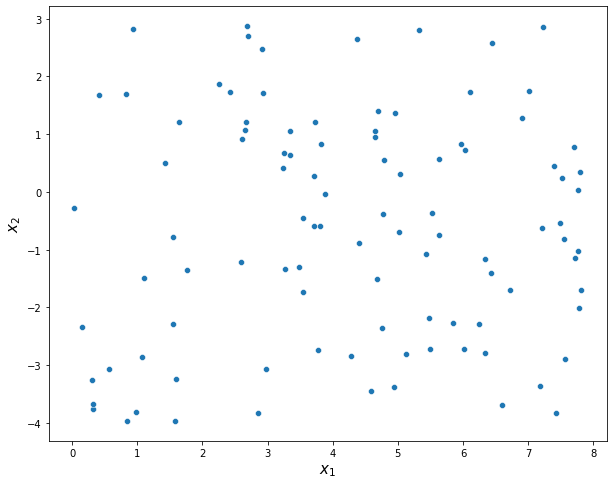

In [163]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = data, x = 'x1', y = 'x2')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.show()

* 선형 분리가 가능하도록 데이터 필터링

In [164]:
C1 = np.where(g >= 1) #조건 만족하는 위치 인덱스 찾기
C0 = np.where(g < -1)  
print(C1)

(array([ 0,  3,  4,  7,  9, 13, 23, 25, 29, 30, 32, 38, 41, 42, 44, 45, 48,
       52, 54, 55, 56, 57, 62, 63, 64, 65, 69, 70, 71, 73, 76, 85, 90, 93]), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))


In [165]:
C1 = np.where(g >= 1)[0]
C0 = np.where(g < -1)[0]
print(C1.shape)
print(C0.shape)

(34,)
(30,)


In [166]:
data.loc[C1]

,x1,x2,g
0,7.555973,-0.806418,2.238360
3,4.655159,0.943243,1.667370
4,4.960674,1.367362,2.335901
7,5.963806,0.829592,2.600637
9,6.027397,0.722230,2.544148
13,7.707723,0.776888,3.943066
23,2.917798,2.467617,1.801855
25,7.761942,0.037319,3.246872
29,7.220276,-0.630949,2.145272
30,6.108605,1.726635,3.613520


In [167]:
data.loc[C0]

,x1,x2,g
2,1.542360,-2.285044,-4.051156
15,1.574434,-3.971227,-5.711679
17,4.587016,-3.450855,-2.781242
21,1.078496,-2.860245,-4.997448
28,1.431500,0.501065,-1.353736
31,1.590884,-3.242273,-4.969566
33,4.764658,-2.349051,-1.537325
34,0.320754,-3.763984,-6.507381
35,6.597024,-3.691152,-1.413533
36,5.122171,-2.812263,-1.714526


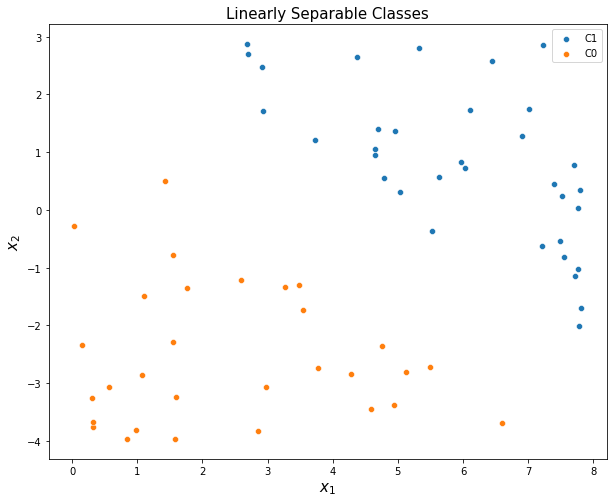

In [168]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data = data.loc[C1], x = 'x1', y = 'x2', label = 'C1')
sns.scatterplot(data = data.loc[C0], x = 'x1', y = 'x2', label = 'C0')
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.title('Linearly Separable Classes', fontsize = 15)
plt.show()

#3. 데이터 전처리

* 행렬 형태로 표현

In [169]:
N = C1.shape[0]
M = C0.shape[0]


In [170]:
np.ones([N,1])

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [171]:
np.hstack([np.ones([N,1]), x1[C1], x2[C1]])

array([[ 1.        ,  7.55597282, -0.80641819],
       [ 1.        ,  4.65515902,  0.94324301],
       [ 1.        ,  4.96067368,  1.36736231],
       [ 1.        ,  5.96380613,  0.82959242],
       [ 1.        ,  6.0273967 ,  0.72223037],
       [ 1.        ,  7.70772282,  0.77688768],
       [ 1.        ,  2.91779809,  2.46761657],
       [ 1.        ,  7.76194177,  0.03731874],
       [ 1.        ,  7.22027591, -0.63094858],
       [ 1.        ,  6.10860548,  1.72663542],
       [ 1.        ,  2.92548934,  1.70687632],
       [ 1.        ,  6.44830697,  2.57936056],
       [ 1.        ,  3.72186733,  1.21790387],
       [ 1.        ,  2.69480735,  2.70250963],
       [ 1.        ,  7.49433278, -0.54031459],
       [ 1.        ,  7.0124372 ,  1.75199772],
       [ 1.        ,  5.63120524,  0.57508688],
       [ 1.        ,  7.22286768,  2.86387271],
       [ 1.        ,  7.81640993, -1.69958777],
       [ 1.        ,  4.6453947 ,  1.05722329],
       [ 1.        ,  7.80284633,  0.340

In [172]:
X1 = np.hstack([np.ones([N,1]), x1[C1], x2[C1]])
X0 = np.hstack([np.ones([M,1]), x1[C0], x2[C0]])

In [173]:
X = np.vstack([X1, X0])
X


array([[ 1.        ,  7.55597282, -0.80641819],
       [ 1.        ,  4.65515902,  0.94324301],
       [ 1.        ,  4.96067368,  1.36736231],
       [ 1.        ,  5.96380613,  0.82959242],
       [ 1.        ,  6.0273967 ,  0.72223037],
       [ 1.        ,  7.70772282,  0.77688768],
       [ 1.        ,  2.91779809,  2.46761657],
       [ 1.        ,  7.76194177,  0.03731874],
       [ 1.        ,  7.22027591, -0.63094858],
       [ 1.        ,  6.10860548,  1.72663542],
       [ 1.        ,  2.92548934,  1.70687632],
       [ 1.        ,  6.44830697,  2.57936056],
       [ 1.        ,  3.72186733,  1.21790387],
       [ 1.        ,  2.69480735,  2.70250963],
       [ 1.        ,  7.49433278, -0.54031459],
       [ 1.        ,  7.0124372 ,  1.75199772],
       [ 1.        ,  5.63120524,  0.57508688],
       [ 1.        ,  7.22286768,  2.86387271],
       [ 1.        ,  7.81640993, -1.69958777],
       [ 1.        ,  4.6453947 ,  1.05722329],
       [ 1.        ,  7.80284633,  0.340

* y값(라벨) 행렬 형태로 표현

In [174]:
y = np.vstack([np.ones([N,1]), -np.ones([M,1])])
y


array([[ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [ 1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.],
       [-1.]])

In [175]:
X = np.asmatrix(X)
y = np.asmatrix(y)

In [176]:
X, y

(matrix([[ 1.        ,  7.55597282, -0.80641819],
         [ 1.        ,  4.65515902,  0.94324301],
         [ 1.        ,  4.96067368,  1.36736231],
         [ 1.        ,  5.96380613,  0.82959242],
         [ 1.        ,  6.0273967 ,  0.72223037],
         [ 1.        ,  7.70772282,  0.77688768],
         [ 1.        ,  2.91779809,  2.46761657],
         [ 1.        ,  7.76194177,  0.03731874],
         [ 1.        ,  7.22027591, -0.63094858],
         [ 1.        ,  6.10860548,  1.72663542],
         [ 1.        ,  2.92548934,  1.70687632],
         [ 1.        ,  6.44830697,  2.57936056],
         [ 1.        ,  3.72186733,  1.21790387],
         [ 1.        ,  2.69480735,  2.70250963],
         [ 1.        ,  7.49433278, -0.54031459],
         [ 1.        ,  7.0124372 ,  1.75199772],
         [ 1.        ,  5.63120524,  0.57508688],
         [ 1.        ,  7.22286768,  2.86387271],
         [ 1.        ,  7.81640993, -1.69958777],
         [ 1.        ,  4.6453947 ,  1.05722329],


#4. 퍼셉트론 학습

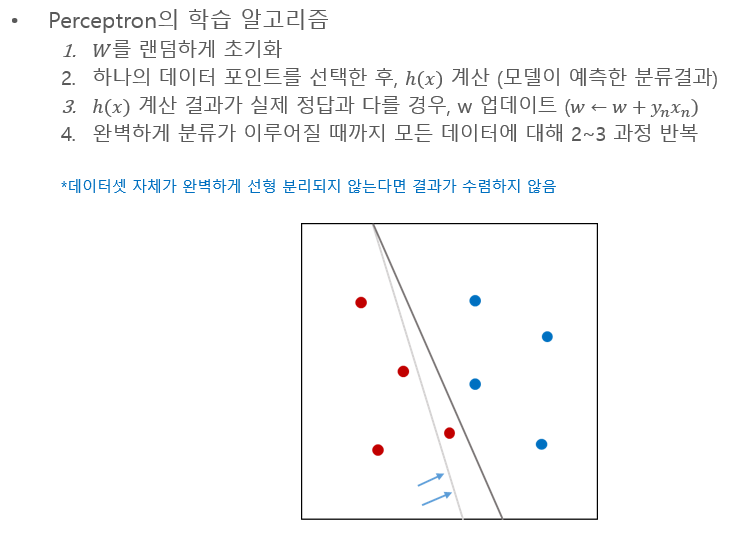

In [177]:
w = np.ones([3,1]) #가중치 행렬 (랜덤초기화해도 상관없음)
w = np.asmatrix(w)



In [178]:
n_iter = y.shape[0] #모든 데이터를 돌면서 업데이트 
for k in range(1000):
    for i in range(n_iter):
        if y[i,0] != np.sign(X[i,:]*w)[0,0]: #오분류되었을 때 업데이트
            #w += y[i,0]*X[i,:].T
            w = w + y[i,0]*X[i,:].T


In [179]:
print(w)

[[-20.        ]
 [  7.66366625]
 [ 15.14187279]]


In [180]:
w.shape

(3, 1)

$h(x) = w_0+w^Tx = w_0+w_1x_1+w_2x_2 = 0$

$\rightarrow \frac{w_1}{w_2}x_1-\frac{w_0}{w_2}$

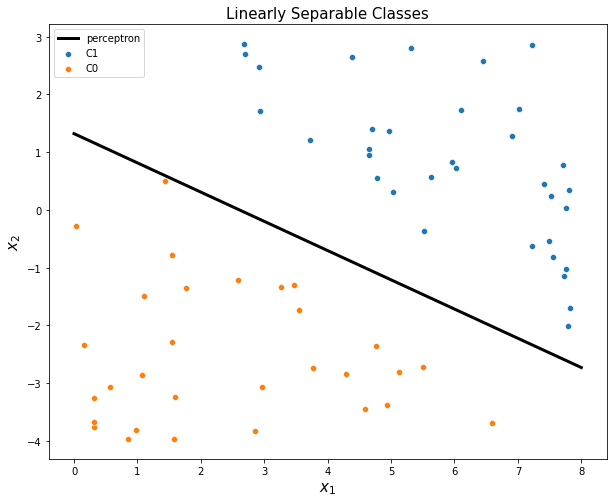

In [181]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w[1,0]/w[2,0]*x1p - w[0,0]/w[2,0]

plt.figure(figsize=(10, 8))
plt.plot(x1p, x2p, c = 'k', linewidth = 3)
sns.scatterplot(data = data.loc[C1], x = 'x1', y = 'x2')
sns.scatterplot(data = data.loc[C0], x = 'x1', y = 'x2')
plt.legend(['perceptron', 'C1','C0'])
plt.xlabel(r'$x_1$', fontsize = 15)
plt.ylabel(r'$x_2$', fontsize = 15)
plt.title('Linearly Separable Classes', fontsize = 15)
plt.show()

# 라이브러리를 활용한 Perceptron 구현

In [182]:
X1 = np.hstack([x1[C1], x2[C1]])   #라이브러리 활용할 때는 bias 별도로 추가안해도 됨 
X0 = np.hstack([x1[C0], x2[C0]])
X = np.vstack([X1, X0])

y = np.vstack([np.ones([C1.shape[0],1]), -np.ones([C0.shape[0],1])])

In [183]:
from sklearn.linear_model import Perceptron 

clf = Perceptron(tol=1e-3)
clf.fit(X, np.ravel(y))

Perceptron()

In [184]:
X.shape

(64, 2)

In [185]:
clf.predict([[3, -2]])

array([-1.])

In [186]:
clf.predict([[6, 2]])

array([1.])

In [187]:
clf.coef_

array([[ 5.66186312, 13.51448742]])

In [188]:
clf.intercept_

array([-15.])

In [ ]:
#초기 가중치에따라 결과가 조금 달라질 순 있음

In [189]:
w0 = clf.intercept_[0]
w1 = clf.coef_[0,0]
w2 = clf.coef_[0,1]

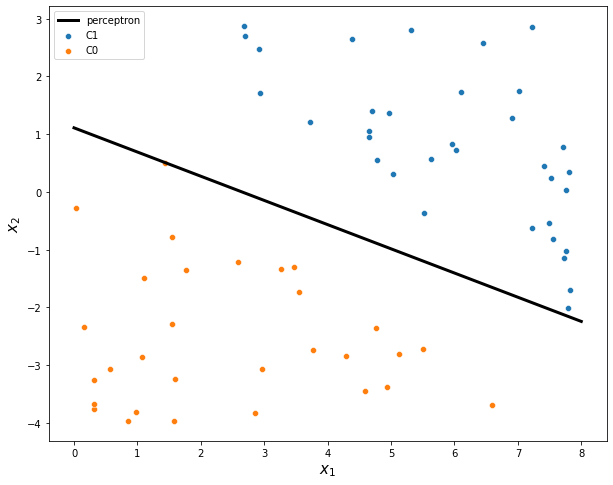

In [192]:
x1p = np.linspace(0,8,100).reshape(-1,1)
x2p = - w1/w2*x1p - w0/w2

plt.figure(figsize=(10, 8))
plt.plot(x1p, x2p, c = 'k', linewidth = 3)
sns.scatterplot(data = data.loc[C1], x = 'x1', y = 'x2')
sns.scatterplot(data = data.loc[C0], x = 'x1', y = 'x2')
plt.legend(['perceptron', 'C1','C0'])
plt.xlabel('$x_1$', fontsize = 15)
plt.ylabel('$x_2$', fontsize = 15)
plt.show()